C:\Users\sangil\AppData\Local\Temp\ipykernel_56916\3150057203.py:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('./data/sales.csv', header = 0, parse_dates = [0], index_col = 0, date_parser=parser)
c:\Users\sangil\anaconda3\envs\sangil\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sangil\anaconda3\envs\sangil\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sangil\anaconda3\envs\sangil\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
 

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Fri, 11 Oct 2024   AIC                            411.302
Time:                        10:49:20   BIC                            420.634
Sample:                    01-01-1991   HQIC                           414.523
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

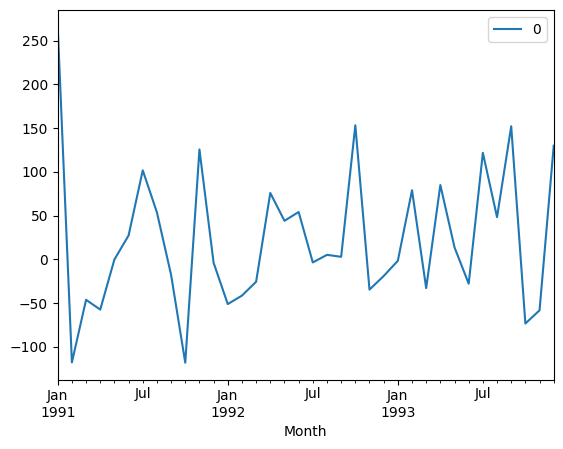

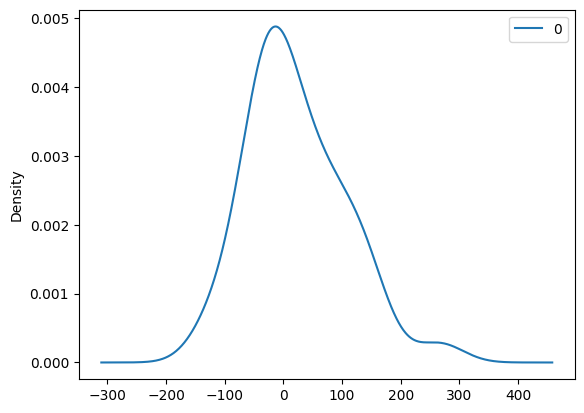

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [2]:
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')

series = read_csv('./data/sales.csv', header = 0, parse_dates = [0], index_col = 0, date_parser=parser)
model = ARIMA(series, order = (5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind = 'kde')
pyplot.show()
print(residuals.describe())

In [3]:
import statsmodels
import pandas as pd

print("statsmodels version:", statsmodels.__version__)
print("pandas version:", pd.__version__)


statsmodels version: 0.14.4
pandas version: 2.2.3


C:\Users\sangil\AppData\Local\Temp\ipykernel_56916\1864205258.py:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('./data/sales.csv', header = 0, parse_dates = [0], index_col = 0, date_parser=parser)
C:\Users\sangil\AppData\Local\Temp\ipykernel_56916\1864205258.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predictied=%f, expected=%f' % (yhat, obs))


predictied=352.855344, expected=346.300000
predictied=277.398036, expected=329.700000
predictied=368.753734, expected=445.400000
predictied=331.773634, expected=325.900000
predictied=372.070414, expected=449.300000
predictied=360.020872, expected=411.300000
predictied=454.526230, expected=417.400000
predictied=388.690693, expected=545.500000
predictied=437.632447, expected=477.600000
predictied=516.437624, expected=687.000000
predictied=520.916191, expected=435.300000
predictied=675.594648, expected=587.300000
predictied=505.201016, expected=676.900000
Test MSE: 9118.818


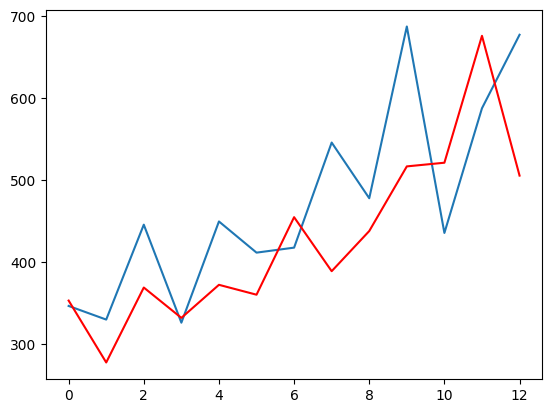

In [4]:
import numpy as np
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')

series = read_csv('./data/sales.csv', header = 0, parse_dates = [0], index_col = 0, date_parser=parser)
x = series.values
x = np.nan_to_num(x)
size = int(len(x) * 0.66)
train, test = x[0:size], x[size:len(x)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order = (5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predictied=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' %error)
pyplot.plot(test)
pyplot.plot(predictions, color = 'red')
pyplot.show()


# RNN 셀 구현

In [1]:
import torch
import torchtext
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import time

In [3]:
start = time.time()
TEXT = torchtext.data.Field(lower=True, fix_length=200, batch_first = False)
LABEL = torchtext.data.Field(sequential=False)

In [4]:
from torchtext import datasets
train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)

downloading aclImdb_v1.tar.gz


.data\imdb\aclImdb_v1.tar.gz: 100%|██████████| 84.1M/84.1M [00:16<00:00, 4.96MB/s]


In [6]:
print(vars(train_data.examples[0]))

{'text': ['bromwell', 'high', 'is', 'a', 'cartoon', 'comedy.', 'it', 'ran', 'at', 'the', 'same', 'time', 'as', 'some', 'other', 'programs', 'about', 'school', 'life,', 'such', 'as', '"teachers".', 'my', '35', 'years', 'in', 'the', 'teaching', 'profession', 'lead', 'me', 'to', 'believe', 'that', 'bromwell', "high's", 'satire', 'is', 'much', 'closer', 'to', 'reality', 'than', 'is', '"teachers".', 'the', 'scramble', 'to', 'survive', 'financially,', 'the', 'insightful', 'students', 'who', 'can', 'see', 'right', 'through', 'their', 'pathetic', "teachers'", 'pomp,', 'the', 'pettiness', 'of', 'the', 'whole', 'situation,', 'all', 'remind', 'me', 'of', 'the', 'schools', 'i', 'knew', 'and', 'their', 'students.', 'when', 'i', 'saw', 'the', 'episode', 'in', 'which', 'a', 'student', 'repeatedly', 'tried', 'to', 'burn', 'down', 'the', 'school,', 'i', 'immediately', 'recalled', '.........', 'at', '..........', 'high.', 'a', 'classic', 'line:', 'inspector:', "i'm", 'here', 'to', 'sack', 'one', 'of', '

In [5]:
import string


In [7]:
for example in train_data.exaples:
    text = [x.lower() for x in vars(example)['text']]
    text = [x.replace("<br", "") for x in text]
    text = [''.join(c for c in s if c not in string.punctuation) for s in text]
    text = [s for s in text if s] # 공백제거
    vars(example)['text'] = text

In [8]:
import random
train_data, valid_data = train_data.split(random_state=random.seed(0), split_ratio=0.8)

In [9]:
print(f"Number of training examples: {len(train_data)}")
print(f"Number of validation examples: {len(valid_data)}")
print(f"Number of testing examples: {len(test_data)}")

Number of training examples: 20000
Number of validation examples: 5000
Number of testing examples: 25000


In [10]:
TEXT.build_vocab(train_data, max_size = 10000, min_freq = 10, vectors = None)
LABEL.build_vocab(train_data)

print(f"Unique tokens in TEXT vocabulary: {len(TEXT.vocab)}")
print(f"Unique tokens on LABEL vocabulary: {len(LABEL.vocab)}")

Unique tokens in TEXT vocabulary: 10002
Unique tokens on LABEL vocabulary: 3


In [11]:
print(LABEL.vocab.stoi)

defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x000001E153F9AF90>>, {'<unk>': 0, 'pos': 1, 'neg': 2})


In [12]:
BATCH_SIZE = 64
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

embedding_dim = 100 # 각 단어를 100차원으로 조정(임베딩 계층을 통과한 후 각 벡터의 크기)
hidden_size = 300 # 은닉층의 노드를 몇개 넣을 것인가?, 

train_iterator, valid_iterator, test_iterator = torchtext.data.BucketIterator.splits(
    (train_data, valid_data, test_data),
    batch_size = BATCH_SIZE,
    device = device
)


In [17]:

class RNNCell_Encoder(nn.Module):
    def __init__(self, input_dim, hidden_size):
        super(RNNCell_Encoder, self).__init__()
        self.rnn = nn.RNNCell(input_dim, hidden_size)
        
    def forward(self, inputs):
        bz = inputs.shape[1]
        ht = torch.zeros((bz, hidden_size)).to(device)
        for word in inputs:
            ht = self.rnn(word, ht)
            
        return ht
    

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.em = nn.Embedding(len(TEXT.vocab.stoi), embedding_dim)
        self.rnn = RNNCell_Encoder(embedding_dim, hidden_size)
        self.fc1 = nn.Linear(hidden_size, 256)
        self.fc2 = nn.Linear(256, 3)
        
    def forward(self, x):
        x = self.em(x)
        x = self.rnn(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    

In [19]:
model = Net()
model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [20]:
def training(epoch, model, trainloader, validloader):
    correct = 0
    total = 0
    running_loss = 0
    
    model.train()
    for b in trainloader:
        x, y = b.text, b.label
        x, y = x.to(device), y.to(device)
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            y_pred = torch.argmax(y_pred, dim = 1)
            correct += (y_pred == y).sum().item()
            total += y.size(0)
            running_loss += loss.item()
            
    epoch_loss = running_loss / len(trainloader.dataset)
    epoch_acc = correct / total
    
    valid_correct = 0
    valid_total = 0
    valid_running_loss = 0
    
    model.eval()
    with torch.no_grad():
        for b in validloader:
            x, y = b.text, b.label
            x, y = x.to(device), y.to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            y_pred = torch.argmax(y_pred, dim = 1)
            valid_correct += (y_pred == y).sum().item()
            valid_total += y.size(0)
            valid_running_loss += loss.item()
            
    epoch_valid_loss = valid_running_loss / len(validloader.dataset)
    epoch_valid_acc = valid_correct / valid_total
    
    print('epoch:', epoch,
          'loss: ', round(epoch_loss, 3),
          'accuracy: ', round(epoch_acc, 3),
            'valid_loss: ', round(epoch_valid_loss, 3),
            'valid_accuracy: ', round(epoch_valid_acc, 3)
        )
    
    return epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc

In [21]:
epochs = 5
train_loss = []
train_acc = []
valid_loss = []
valid_acc = []

for epoch in range(epochs):
    epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc = training(epoch, model, train_iterator, valid_iterator)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    valid_loss.append(epoch_valid_loss)
    valid_acc.append(epoch_valid_acc)
    
end = time.time()
print(end - start)

epoch: 0 loss:  0.011 accuracy:  0.498 valid_loss:  0.011 valid_accuracy:  0.505
epoch: 1 loss:  0.011 accuracy:  0.503 valid_loss:  0.011 valid_accuracy:  0.499
epoch: 2 loss:  0.011 accuracy:  0.518 valid_loss:  0.011 valid_accuracy:  0.496
epoch: 3 loss:  0.011 accuracy:  0.519 valid_loss:  0.011 valid_accuracy:  0.495
epoch: 4 loss:  0.011 accuracy:  0.527 valid_loss:  0.011 valid_accuracy:  0.508
237546.06756734848


In [24]:
def evaluate(epoch, model, testloader):
    test_correct = 0
    test_total = 0
    test_running_loss = 0
    
    model.eval()
    with torch.no_grad():
        for b in testloader:
            x, y = b.text, b.label
            x, y = x.to(device), y.to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            y_pred = torch.argmax(y_pred, dim = 1)
            test_correct += (y_pred == y).sum().item()
            test_total += y.size(0)
            test_running_loss += loss.item()
            
    epoch_test_loss = test_running_loss / len(testloader.dataset)
    epoch_test_acc = test_correct / test_total
    
    print('epoch: ', epoch,
          'test_loss: ', round(epoch_test_loss, 3),
          'test_accuracy: ', round(epoch_test_acc, 3))
    
    return epoch_test_loss, epoch_test_acc

In [25]:
epochs = 5
test_loss = []
test_acc = []

for epoch in range(epochs):
    epoch_test_loss, epoch_test_acc = evaluate(epoch, model, test_iterator)
    
    test_loss.append(epoch_test_loss)
    test_acc.append(epoch_test_acc)
    
end = time.time()
print(end - start)

epoch:  0 test_loss:  0.011 test_accuracy:  0.503
epoch:  1 test_loss:  0.011 test_accuracy:  0.503
epoch:  2 test_loss:  0.011 test_accuracy:  0.503
epoch:  3 test_loss:  0.011 test_accuracy:  0.503
epoch:  4 test_loss:  0.011 test_accuracy:  0.503
237844.58596086502


In [27]:
import torch
import torchtext
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import time

start = time.time()
TEXT = torchtext.data.Field(sequential = True, batch_first = True, lower = True)
LABEL = torchtext.data.Field(sequential = False, batch_first = True)

from torchtext import datasets
train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)
train_data, valid_data = train_data.split(split_ratio = 0.8)

TEXT.build_vocab(train_data, max_size = 10000, min_freq = 10, vectors = None)
LABEL.build_vocab(train_data)

BATCH_SIZE = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [29]:
train_iterator, valid_iterator, test_iterator = torchtext.data.BucketIterator.splits(
    (train_data, valid_data, test_data),
    batch_size = BATCH_SIZE,
    device = device
    )

In [30]:
vocab_size = len(TEXT.vocab)
n_classes = 2

In [31]:
class BasicRNN(nn.Module):
    def __init__(self, n_layers, hidden_dim, n_vocab, embed_dim, n_classes, dropout_p = 0.2):
        super(BasicRNN, self).__init__()
        self.n_layers = n_layers
        self.embed = nn.Embedding(n_vocab, embed_dim)
        self.hidden_dim = hidden_dim
        self.dropout = nn.Dropout(dropout_p)
        self.rnn = nn.RNN(embed_dim, self.hidden_dim, num_layers = self.n_layers, batch_first = True)
        self.out = nn.Linear(self.hidden_dim, n_classes)
        
    def forward(self, x):
        x = self.embed(x)
        h_0 = self._init_state(batch_size = x.size(0))
        x, _ = self.rnn(x, h_0)
        h_t = x[:, -1, :]
        self.dropout(h_t)
        logit = torch.sigmoid(self.out(h_t))
        
        return logit
        
    def _init_state(self, batch_size = 1):
        weight = next(self.parameters()).data
        return weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()
    

In [33]:
model = BasicRNN(n_layers = 1, hidden_dim = 256, n_vocab = vocab_size, embed_dim = 128, n_classes = n_classes, dropout_p = 0.5)
model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [42]:
def train(model, optimizer, train_iter):
    model.train()
    for b, batch in enumerate(train_iter):
        x, y = batch.text.to(device), batch.label.to(device)
        y.data.sub_(1)
        optimizer.zero_grad()
        
        logit = model(x)
        loss = F.cross_entropy(logit, y)
        loss.backward()
        optimizer.step()
        
        if b % 50 == 0:
            print('Train Epoch: [{}/{} ({:.0f}%)] \t Loss: {:.6f}'.format(b * len(x), len(train_iter.dataset), 100. * b / len(train_iter), loss.item()))

In [40]:
def evaluate(model, val_iter):
    model.eval()
    corrects, total, total_loss = 0, 0, 0
    
    for batch in val_iter:
        x, y = batch.text.to(device), batch.label.to(device)
        y.data.sub_(1)
        logit = model(x)
        loss = F.cross_entropy(logit, y, reduction = "sum")
        total += y.size(0)
        total_loss += loss.item()
        corrects += (logit.max(1)[1].view(y.size()).data == y.data).sum()
        
    avg_loss = total_loss / len(val_iter.dataset)
    avg_accuracy = corrects / total
    return avg_loss, avg_accuracy

In [43]:
BATCH_SIZE = 100
LR = 0.001
EPOCHS = 5
for e in range(1, EPOCHS + 1):
    train(model, optimizer, train_iterator)
    val_loss, val_accuracy = evaluate(model, valid_iterator)
    
    print("[EPOCH: %d], validation Loss: %5.2f || validation accuracy: %5.2f" %(e, val_loss, val_accuracy))

Train Epoch: [0/20000 (0%)] 	 Loss: 0.692232
Train Epoch: [5000/20000 (25%)] 	 Loss: 0.693088
Train Epoch: [10000/20000 (50%)] 	 Loss: 0.693002
Train Epoch: [15000/20000 (75%)] 	 Loss: 0.692580
[EPOCH: 1], validation Loss:  0.69 || validation accuracy:  0.49
Train Epoch: [0/20000 (0%)] 	 Loss: 0.692664
Train Epoch: [5000/20000 (25%)] 	 Loss: 0.692651
Train Epoch: [10000/20000 (50%)] 	 Loss: 0.693432
Train Epoch: [15000/20000 (75%)] 	 Loss: 0.692943
[EPOCH: 2], validation Loss:  0.69 || validation accuracy:  0.49
Train Epoch: [0/20000 (0%)] 	 Loss: 0.691342
Train Epoch: [5000/20000 (25%)] 	 Loss: 0.692583
Train Epoch: [10000/20000 (50%)] 	 Loss: 0.693698
Train Epoch: [15000/20000 (75%)] 	 Loss: 0.693574
[EPOCH: 3], validation Loss:  0.69 || validation accuracy:  0.49
Train Epoch: [0/20000 (0%)] 	 Loss: 0.692980
Train Epoch: [5000/20000 (25%)] 	 Loss: 0.693457
Train Epoch: [10000/20000 (50%)] 	 Loss: 0.695361
Train Epoch: [15000/20000 (75%)] 	 Loss: 0.692225
[EPOCH: 4], validation Loss: 

In [45]:
test_loss, test_acc = evaluate(model, test_iterator)
print("Test Loss: %5.2f | Test Accuracy %5.2f" %(test_loss, test_acc))

Test Loss:  0.70 | Test Accuracy  0.44


# LSTM구현

In [48]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from torch.autograd import Variable
from torch.nn import Parameter
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader
import math

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
cuda = True if torch.cuda.is_available() else False
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

torch.manual_seed(125)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(125)

In [49]:
import torchvision.transforms as transforms

mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (1.0,))
])

In [51]:
from torchvision.datasets import MNIST
download_root = './data/MNIST_DATASET'

train_dataset = MNIST(download_root, transform = mnist_transform, train = True, download = True)
valid_dataset = MNIST(download_root, transform = mnist_transform, train = False, download = True)
test_dataset = MNIST(download_root, transform = mnist_transform, train = False, download = True)

In [52]:
batch_size = 64
train_loader = DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
valid_loader = DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = True)

In [53]:
batch_size = 100
n_iters = 6000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

In [66]:
class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, bias = True):
        super(LSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bias = True
        self.x2h = nn.Linear(input_size, 4 * hidden_size, bias = bias)
        self.h2h = nn.Linear(hidden_size, 4*hidden_size, bias = True)
        self.reset_parameters()
        
    def reset_parameters(self):
        std = 1.0 / math.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std, std)
    
    def forward(self, x, hidden):
        hx, cx = hidden
        x = x.view(-1, x.size(1))
        
        gates = self.x2h(x) + self.h2h(hx) # gates = F.linear(input, w_ih, b_ih) + F.linear(hx, w_hh, b_hh)
        gates = gates.squeeze()
        ingate, forgetgate, cellgate, outgate = gates.chunk(4, 1)
        
        ingate = F.sigmoid(ingate)
        forgetgate = F.sigmoid(forgetgate)
        cellgate = F.tanh(cellgate)
        outgate = F.sigmoid(outgate)
        
        cy = torch.mul(cx, forgetgate) + torch.mul(ingate, cellgate)
        hy = torch.mul(outgate, F.tanh(cy))
        
        return (hy, cy)
        

In [70]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, bias = True):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        
        self.layer_dim = layer_dim
        self.lstm = LSTMCell(input_dim, hidden_dim, layer_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        if torch.cuda.is_available():
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        else:
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
            
        if torch.cuda.is_available():
            c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        else:
            c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
            
        outs = []
        cn = c0[0, :, :]
        hn = h0[0, :,:]
        
        for seq in range(x.size(1)):
            hn, cn = self.lstm(x[:, seq,:], (hn, cn))
            outs.append(hn)
            
        out = outs[-1].squeeze()
        out = self.fc(out)
        return out

In [71]:
input_dim = 28
hidden_dim = 128
layer_dim = 1
output_dim = 10

model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)
if torch.cuda.is_available():
    model.cuda()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [72]:
seq_dim = 28
loss_list = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
            labels = Variable(labels.cuda())
        else :
            images = Variable(images.view(-1, seq_dim, input_dim))
            labels = Variable(labels)
            
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        if torch.cuda.is_available():
            loss.cuda()
            
        loss.backward()
        optimizer.step()
        loss_list.append(loss.item())
        iter += 1
        
        if iter % 500 == 0 :
            correct = 0
            total = 0
            for images, labels in valid_loader:
                
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, seq_dim, input_dim).cuda())
                else:
                    images = Variable(images.view(-1, seq_dim, input_dim))
                    
                
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                
                total += labels.size(0)
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
                    
            accuracy = 100* correct / total
            
            print("Iteration: {}, Loss: {}, Accuracy: {}".format(iter, loss.item(), accuracy))

Iteration: 500, Loss: 2.2569704055786133, Accuracy: 17.219999313354492
Iteration: 1000, Loss: 0.8176823854446411, Accuracy: 64.20999908447266
Iteration: 1500, Loss: 0.6097004413604736, Accuracy: 89.41999816894531
Iteration: 2000, Loss: 0.307455837726593, Accuracy: 93.93000030517578
Iteration: 2500, Loss: 0.24373377859592438, Accuracy: 95.37000274658203
Iteration: 3000, Loss: 0.0989944264292717, Accuracy: 95.6500015258789
Iteration: 3500, Loss: 0.17116060853004456, Accuracy: 96.48999786376953
Iteration: 4000, Loss: 0.17932550609111786, Accuracy: 96.69999694824219
Iteration: 4500, Loss: 0.129627987742424, Accuracy: 96.91000366210938
Iteration: 5000, Loss: 0.08130969107151031, Accuracy: 97.29000091552734
Iteration: 5500, Loss: 0.05045017600059509, Accuracy: 97.44999694824219
Iteration: 6000, Loss: 0.053883302956819534, Accuracy: 97.11000061035156
Iteration: 6500, Loss: 0.03769288212060928, Accuracy: 97.37000274658203
Iteration: 7000, Loss: 0.13372738659381866, Accuracy: 97.3499984741211
I

In [76]:
def evaluate(model, val_iter):
    corrects, total, total_loss = 0, 0, 0
    model.eval()
    for images, labels in val_iter:
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
        else:
            images = Variable(images.view(-1, seq_dim, input_dim)).to(device)
        labels = labels.cuda()
        logit = model(images).to(device)
        loss = F.cross_entropy(logit, labels, reduction="sum")
        _, predicted = torch.max(logit.data, 1)
        total += labels.size(0)
        total_loss += loss.item()
        corrects += (predicted == labels).sum()
        
    avg_loss = total_loss / len(val_iter.dataset)
    avg_accuracy = corrects / total
    
    return avg_loss, avg_accuracy

In [77]:
test_loss, test_acc = evaluate(model, test_loader)
print("Test Loss: %5.2f | Test Accuracy: %5.2f"%(test_loss, test_acc))

Test Loss:  0.07 | Test Accuracy:  0.98


In [78]:
import os
import time

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [79]:
data = pd.read_csv('./data/SBUX.csv')
print(data.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [80]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-11,86.260002,86.870003,85.849998,86.589996,84.145752,4921900
1,2019-12-12,88.000000,88.889999,87.540001,88.209999,85.720032,10282100
2,2019-12-13,88.019997,88.790001,87.580002,88.669998,86.167046,6714100
3,2019-12-16,89.139999,89.300003,88.430000,88.779999,86.273941,6705600
4,2019-12-17,88.870003,88.970001,87.470001,88.129997,85.642288,7296900


In [82]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace = True)

In [83]:
data['Volume'] = data['Volume'].astype(float)

In [85]:
x = data.iloc[:, :-1]
y = data.iloc[:, 5:6]
print(x)
print(y)

                  Open        High         Low       Close   Adj Close
Date                                                                  
2019-12-11   86.260002   86.870003   85.849998   86.589996   84.145752
2019-12-12   88.000000   88.889999   87.540001   88.209999   85.720032
2019-12-13   88.019997   88.790001   87.580002   88.669998   86.167046
2019-12-16   89.139999   89.300003   88.430000   88.779999   86.273941
2019-12-17   88.870003   88.970001   87.470001   88.129997   85.642288
...                ...         ...         ...         ...         ...
2020-12-04  101.349998  102.940002  101.070000  102.279999  101.442787
2020-12-07  102.010002  102.220001  100.690002  101.410004  100.579918
2020-12-08  100.370003  101.570000  100.010002  101.209999  100.381554
2020-12-09  101.940002  102.209999  100.099998  100.400002   99.578186
2020-12-10  103.510002  106.089996  102.750000  105.389999  104.527336

[253 rows x 5 columns]
                Volume
Date                  
2019-12

In [150]:

ms = MinMaxScaler()
ss = StandardScaler()

x_ss = ss.fit_transform(x)
y_ms = ms.fit_transform(y)

x_train = x_ss[:200, :]
x_test = x_ss[200:, :]

y_train = y_ms[:200, :]
y_test = y_ms[200:, :]

print("Training shape", x_train.shape, y_train.shape)
print("Testing shape", x_test.shape, y_test.shape)
print(x_train)
print(y_train)

Training shape (200, 5) (200, 1)
Testing shape (53, 5) (53, 1)
[[ 0.46501033  0.43644414  0.51542403  0.49614696  0.39551683]
 [ 0.6539359   0.66267575  0.69038876  0.67120687  0.56533718]
 [ 0.65610714  0.65147637  0.69453003  0.72091504  0.61355736]
 [ 0.77771476  0.70859458  0.78252968  0.73280192  0.62508831]
 [ 0.74839912  0.67163566  0.68314171  0.66256174  0.55695079]
 [ 0.69628123  0.65819579  0.71937685  0.64743324  0.54227355]
 [ 0.63547785  0.62907659  0.69453003  0.70470572  0.59783311]
 [ 0.73971266  0.67499543  0.72662379  0.69822224  0.59154387]
 [ 0.72125461  0.65819579  0.75664737  0.67336854  0.56743334]
 [ 0.67565119  0.63019678  0.73801211  0.70470572  0.59783311]
 [ 0.7331982   0.6481166   0.71627107  0.65715921  0.5517092 ]
 [ 0.6658796   0.61451744  0.70591825  0.66256174  0.55695079]
 [ 0.6550219   0.58539824  0.64069441  0.58799986  0.48462019]
 [ 0.59313242  0.56187918  0.66657672  0.63986894  0.53493654]
 [ 0.66696559  0.71419383  0.74318888  0.79439685  0.68

In [152]:

x_train_tensors = Variable(torch.Tensor(x_train))
x_test_tensors = Variable(torch.Tensor(x_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

x_train_tensors_f = torch.reshape(x_train_tensors, (x_train_tensors.shape[0], 1, x_train_tensors.shape[1]))
x_test_tensors_f = torch.reshape(x_test_tensors, (x_test_tensors.shape[0], 1, x_test_tensors.shape[1]))

print("Training shape", x_train_tensors_f.shape, y_train_tensors.shape)
print("Testing shape", x_test_tensors_f.shape, y_test_tensors.shape)
print(x_train_tensors_f)

Training shape torch.Size([200, 1, 5]) torch.Size([200, 1])
Testing shape torch.Size([53, 1, 5]) torch.Size([53, 1])
tensor([[[ 0.4650,  0.4364,  0.5154,  0.4961,  0.3955]],

        [[ 0.6539,  0.6627,  0.6904,  0.6712,  0.5653]],

        [[ 0.6561,  0.6515,  0.6945,  0.7209,  0.6136]],

        [[ 0.7777,  0.7086,  0.7825,  0.7328,  0.6251]],

        [[ 0.7484,  0.6716,  0.6831,  0.6626,  0.5570]],

        [[ 0.6963,  0.6582,  0.7194,  0.6474,  0.5423]],

        [[ 0.6355,  0.6291,  0.6945,  0.7047,  0.5978]],

        [[ 0.7397,  0.6750,  0.7266,  0.6982,  0.5915]],

        [[ 0.7213,  0.6582,  0.7566,  0.6734,  0.5674]],

        [[ 0.6757,  0.6302,  0.7380,  0.7047,  0.5978]],

        [[ 0.7332,  0.6481,  0.7163,  0.6572,  0.5517]],

        [[ 0.6659,  0.6145,  0.7059,  0.6626,  0.5570]],

        [[ 0.6550,  0.5854,  0.6407,  0.5880,  0.4846]],

        [[ 0.5931,  0.5619,  0.6666,  0.6399,  0.5349]],

        [[ 0.6670,  0.7142,  0.7432,  0.7944,  0.6848]],

        [[ 0.

In [88]:
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size,
                            num_layers = num_layers, batch_first = True)
        self.fc_1 = nn.Linear(hidden_size, 128)
        self.fc = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        
        output, (hn, cn) = self.lstm(x, (h_0, c_0))
        hn = hn.view(-1, self.hidden_size)
        out = self.relu(hn)
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.fc(out)
        
        return out

In [89]:
num_epochs = 1000
learning_rate = 0.0001

input_size = 5
hidden_size = 2
num_layers = 1

num_classes = 1
model = LSTM(num_classes, input_size, hidden_size, num_layers, x_train_tensors_f.shape[1])

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [154]:

for epoch in range(num_epochs):
    outputs = model.forward(x_train_tensors_f)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train_tensors)
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" %(epoch, loss.item()))

Epoch: 0, loss: 0.02623
Epoch: 100, loss: 0.02539
Epoch: 200, loss: 0.02461
Epoch: 300, loss: 0.02389
Epoch: 400, loss: 0.02322
Epoch: 500, loss: 0.02261
Epoch: 600, loss: 0.02206
Epoch: 700, loss: 0.02155
Epoch: 800, loss: 0.02110
Epoch: 900, loss: 0.02069


In [91]:
df_x_ss = ss.transform(data.iloc[:, :-1])
df_y_ms = ms.transform(data.iloc[:, -1:])

df_x_ss = Variable(torch.Tensor(df_x_ss))
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))

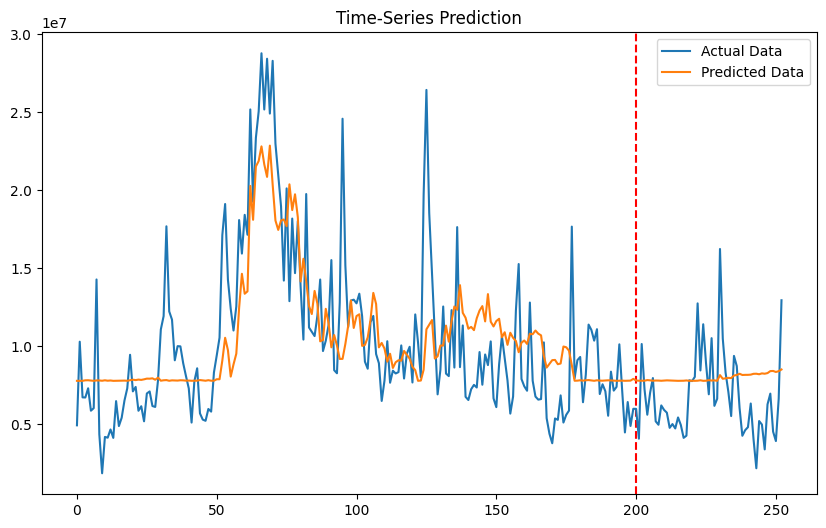

In [92]:
train_predict = model(df_x_ss)
predicted = train_predict.data.numpy()
label_y = df_y_ms.data.numpy()

predicted = ms.inverse_transform(predicted)
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10, 6))
plt.axvline(x = 200, c = 'r', linestyle = '--')

plt.plot(label_y, label = 'Actual Data')
plt.plot(predicted, label="Predicted Data")
plt.title('Time-Series Prediction')
plt.legend()
plt.show()

# GRU셀 구현

In [94]:
import torch
import torch.nn as nn 
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from torch.autograd import Variable
from torch.nn import Parameter
from torch import Tensor 
import torch.nn.functional as F
from torch.utils.data import DataLoader
import math

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

cuda = True if torch.cuda.is_available() else False

Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

torch.manual_seed(125)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(125)

In [95]:
mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (1.0, ))
])

In [96]:
from torchvision.datasets import MNIST
download_root = './data/MNIST_DATASET'
train_dataset = MNIST(download_root, transform = mnist_transform, train = True, download = True)
valid_dataset = MNIST(download_root, transform = mnist_transform, train = False, download = True)
test_dataset = MNIST(download_root, transform = mnist_transform, train = False, download = True)


In [97]:
batch_size = 64
train_loader = DataLoader(dataset = train_dataset,
                          batch_size = batch_size,
                          shuffle = True)
valid_loader = DataLoader(dataset = valid_dataset,
                          batch_size = batch_size,
                          shuffle = True)
test_loader = DataLoader(dataset = test_dataset,
                          batch_size = batch_size,
                          shuffle = True)


In [98]:
batch_size = 100
n_iters = 6000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

In [109]:
class GRUCell(nn.Module):
    def __init__(self, input_size, hidden_size, bias = True):
        super(GRUCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bias = bias
        self.x2h = nn.Linear(input_size, 3 * hidden_size, bias = bias)
        self.h2h = nn.Linear(hidden_size, 3 * hidden_size, bias = bias)
        self.reset_parameters()
        
    def reset_parameters(self):
        std = 1.0 / math.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std, std)
            
    def forward(self, x, hidden):
        x = x.view(-1, x.size(1))
        
        gate_x = self.x2h(x)
        gate_h = self.h2h(hidden)
        
        gate_x = gate_x.squeeze()
        gate_h = gate_h.squeeze()
        
        i_r, i_i, i_n = gate_x.chunk(3, 1)
        h_r, h_i, h_n = gate_h.chunk(3, 1)
        
        resetgate = F.sigmoid(i_r + h_r)
        inputgate = F.sigmoid(i_i+ h_i)
        newgate = F.tanh(i_n + (resetgate * h_n))
        
        hy = newgate + inputgate * (hidden - newgate)
        return hy

In [110]:
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, bias = True):
        super(GRUModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.gru_cell = GRUCell(input_dim, hidden_dim, layer_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        if torch.cuda.is_available():
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda())
        else:
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
            
        outs = []
        hn = h0[0,:,:]
        for seq in range(x.size(1)):
            hn = self.gru_cell(x[:, seq, :], hn)
            outs.append(hn)
            
        out = outs[-1].squeeze()
        out = self.fc(out)
        return out

In [111]:
input_dim = 28
hidden_dim = 128
layer_dim = 1
output_dim = 10

model = GRUModel(input_dim, hidden_dim, layer_dim, output_dim)

if torch.cuda.is_available():
    model.cuda()
    
criterion = nn.CrossEntropyLoss()
learningrate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [112]:
seq_dim = 28
loss_list = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
            labels = Variable(labels.cuda())
        else:
            images = Variable(images.view(-1, seq_dim, input_dim))
            labels = Variable(labels)
            
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        if torch.cuda.is_available():
            loss.cuda()
            
        loss.backward()
        optimizer.step()
        
        loss_list.append(loss.item())
        iter += 1
        
        if iter % 500 == 0:
            correct = 0
            total = 0
            for images, labels in valid_loader:
                if torch.cuda.is_available():
                    images = Variable(images.view(-1, seq_dim, input_dim).cuda())
                else:
                    images = Variable(images.view(-1, seq_dim, input_dim))
                    
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else :
                    correct += (predicted == labels).sum()
                    
            accuracy = 100 * correct / total
            print("Iteration: {}, Loss: {}, Accuracy: {}".format(iter, loss.item(), accuracy))

Iteration: 500, Loss: 2.308727264404297, Accuracy: 7.980000019073486
Iteration: 1000, Loss: 2.2897534370422363, Accuracy: 7.71999979019165
Iteration: 1500, Loss: 2.284925699234009, Accuracy: 7.230000019073486
Iteration: 2000, Loss: 2.2893259525299072, Accuracy: 7.360000133514404
Iteration: 2500, Loss: 2.2963109016418457, Accuracy: 6.96999979019165
Iteration: 3000, Loss: 2.3001797199249268, Accuracy: 6.900000095367432
Iteration: 3500, Loss: 2.291482448577881, Accuracy: 6.960000038146973
Iteration: 4000, Loss: 2.29115629196167, Accuracy: 7.179999828338623
Iteration: 4500, Loss: 2.2977428436279297, Accuracy: 7.110000133514404
Iteration: 5000, Loss: 2.309235095977783, Accuracy: 7.239999771118164
Iteration: 5500, Loss: 2.3026609420776367, Accuracy: 9.649999618530273
Iteration: 6000, Loss: 2.2964725494384766, Accuracy: 11.59000015258789
Iteration: 6500, Loss: 2.296970844268799, Accuracy: 10.880000114440918
Iteration: 7000, Loss: 2.292037010192871, Accuracy: 12.0600004196167
Iteration: 7500, 

In [117]:
def evaluate(model, val_iter):
    corrects, total, total_loss = 0, 0, 0
    model.eval()
    for images, labels in val_iter:
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
        else:
            images = Variable(images.view(-1, seq_dim, input_dim)).to(device)
        labels = labels.cuda()
        logit = model(images).to(device)
        loss = F.cross_entropy(logit, labels,  reduction = 'sum')
        _, predicted = torch.max(logit.data, 1)
        total += labels.size(0)
        total_loss += loss.item()
        corrects += (predicted == labels).sum()
        
    avg_loss = total_loss / len(val_iter.dataset)
    avg_accuracy = corrects / total
    
    return avg_loss, avg_accuracy

In [118]:
test_loss, test_acc = evaluate(model, test_loader)
print("Test Loss: %5.2f | Test Accuracy: %5.2f"% (test_loss, test_acc))

Test Loss:  2.30 | Test Accuracy:  0.12


# GRU 계층 구현

In [119]:
import os, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [120]:
data = pd.read_csv('./data/SBUX.csv')
print(data.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [121]:
data['Date'] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace = True)
data["Volume"] = data["Volume"].astype(float)

In [122]:
x = data.iloc[:, :-1]
y = data.iloc[:, 5:6]
print(x)
print(y)

                  Open        High         Low       Close   Adj Close
Date                                                                  
2019-12-11   86.260002   86.870003   85.849998   86.589996   84.145752
2019-12-12   88.000000   88.889999   87.540001   88.209999   85.720032
2019-12-13   88.019997   88.790001   87.580002   88.669998   86.167046
2019-12-16   89.139999   89.300003   88.430000   88.779999   86.273941
2019-12-17   88.870003   88.970001   87.470001   88.129997   85.642288
...                ...         ...         ...         ...         ...
2020-12-04  101.349998  102.940002  101.070000  102.279999  101.442787
2020-12-07  102.010002  102.220001  100.690002  101.410004  100.579918
2020-12-08  100.370003  101.570000  100.010002  101.209999  100.381554
2020-12-09  101.940002  102.209999  100.099998  100.400002   99.578186
2020-12-10  103.510002  106.089996  102.750000  105.389999  104.527336

[253 rows x 5 columns]
                Volume
Date                  
2019-12

In [123]:
ms = MinMaxScaler()
ss = StandardScaler()

x_ss = ss.fit_transform(x)
y_ms = ms.fit_transform(y)

x_train = x_ss[:200, :]
x_test = x_ss[200:, :]

y_train = y_ms[:200, :]
y_test = y_ms[200:, :]

print("Training Shape", x_train.shape, y_train.shape)
print("Testing Shape", x_test.shape, y_test.shape)

Training Shape (200, 5) (200, 1)
Testing Shape (53, 5) (53, 1)


In [124]:
x_train_tensors = Variable(torch.Tensor(x_train))
x_test_tensros = Variable(torch.Tensor(x_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

x_train_tensors_f = torch.reshape(x_train_tensors, (x_train_tensors.shape[0], 1, x_train_tensors.shape[1]))
x_test_tensor_f = torch.reshape(x_test_tensors, (x_test_tensors.shape[0], 1, x_test_tensors.shape[1]))

print("Training Shape", x_train_tensors_f.shape, y_train_tensors.shape)
print("Testing Shape", x_test_tensors_f.shape, y_test_tensors.shape)

Training Shape torch.Size([200, 1, 5]) torch.Size([200, 1])
Testing Shape torch.Size([53, 1, 5]) torch.Size([53, 1])


In [129]:
class GRU(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(GRU, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.gru = nn.GRU(input_size = input_size, hidden_size = hidden_size,
                          num_layers = num_layers, batch_first = True)
        self.fc_1 = nn.Linear(hidden_size, 128)
        self.fc = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        output, (hn) = self.gru(x, (h_0))
        hn = hn.view(-1, self.hidden_size)
        out = self.relu(hn)
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.fc(out)
        
        return out

In [130]:
num_epochs = 1000
learning_rate = 0.0001

input_size = 5
hidden_size = 2
num_layers = 1

num_classes = 1
model = GRU(num_classes, input_size, hidden_size, num_layers, x_train_tensors_f.shape[1])

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [131]:
for epoch in range(num_epochs):
    outputs = model.forward(x_train_tensors_f)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train_tensors)
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" %(epoch, loss.item()))

Epoch: 0, loss: 0.08955
Epoch: 100, loss: 0.03963
Epoch: 200, loss: 0.03810
Epoch: 300, loss: 0.03694
Epoch: 400, loss: 0.03566
Epoch: 500, loss: 0.03461
Epoch: 600, loss: 0.03404
Epoch: 700, loss: 0.03381
Epoch: 800, loss: 0.03366
Epoch: 900, loss: 0.03351


In [132]:
df_x_ss = ss.transform(data.iloc[:, :-1])
df_y_ms = ms.transform(data.iloc[:, -1:])

df_x_ss = Variable(torch.Tensor(df_x_ss))
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))

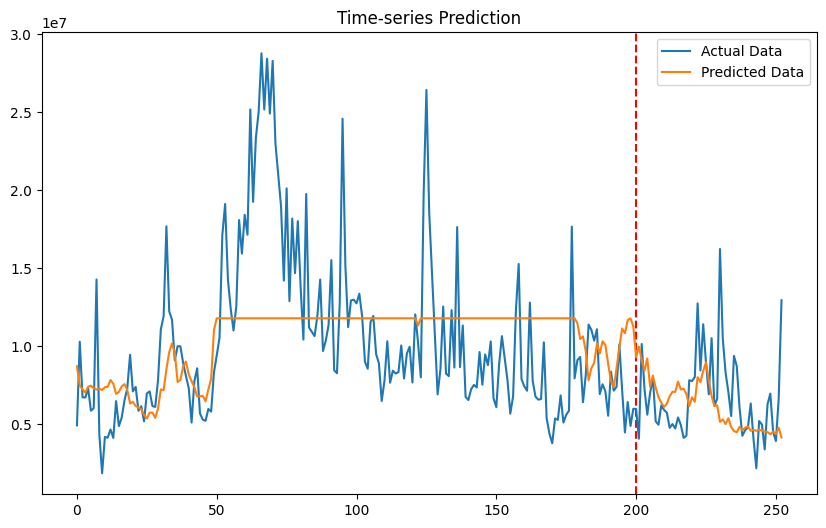

In [133]:
train_predict = model(df_x_ss)
predicted = train_predict.data.numpy()
label_y = df_y_ms.data.numpy()

predicted = ms.inverse_transform(predicted)
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10, 6))
plt.axvline(x = 200, c = 'r', linestyle='--')

plt.plot(label_y, label = "Actual Data")
plt.plot(predicted, label = "Predicted Data")
plt.title("Time-series Prediction")
plt.legend()
plt.show()

# 양방향 RNN

In [135]:
import os, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

data = pd.read_csv('./data/SBUX.csv')
print(data.dtypes)

data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace = True)
data["Volume"] = data["Volume"].astype(float)

x = data.iloc[:, :-1]
y = data.iloc[:, 5:6]

ms = MinMaxScaler()
ss = StandardScaler()

x_ss = ss.fit_transform(x)
y_ms = ms.fit_transform(y)

x_train = x_ss[:200, :]
x_test = x_ss[200:, :]
y_train = y_ms[:200, :]
y_test = y_ms[200:, :]

x_train_tensors = Variable(torch.Tensor(x_train))
y_test_tensors = Variable(torch.Tensor(y_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

x_train_tensors_f = torch.reshape(x_train_tensors, (x_train_tensors.shape[0], 1, x_train_tensors.shape[1]))
x_test_tensors_f = torch.reshape(x_test_tensors, (x_test_tensors.shape[0], 1, x_test_tensors.shape[1]))

print("Training shape", x_train_tensors_f.shape, y_train_tensors.shape)
print("Testing shape", x_test_tensors_f.shape, y_test_tensors.shape)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
Training shape torch.Size([200, 1, 5]) torch.Size([200, 1])
Testing shape torch.Size([53, 1, 5]) torch.Size([53, 1])


In [136]:
class biLSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(biLSTM, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size,
                            num_layers = num_layers, bidirectional = True, batch_first = True)
        self.fc = nn.Linear(hidden_size * 2, num_classes)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        h_0 = Variable(torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size))
        out, _ = self.lstm(x, (h_0, c_0))
        out = self.fc(out[:, -1, :])
        out = self.relu(out)
        return out

In [138]:
NUM_EPOCHS = 1000
learning_rate = 0.0001

input_size = 5
hidden_size = 2
num_layers = 1

num_classes = 1
model = biLSTM(num_classes, input_size , hidden_size, num_layers, x_train_tensors_f.shape[1])
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

for epoch in range(num_epochs):
    outputs = model.forward(x_train_tensors_f)
    optimizer.zero_grad()
    
    loss = criterion(outputs, y_train_tensors)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" %(epoch, loss.item()))

Epoch: 0, loss: 0.12040
Epoch: 100, loss: 0.11390
Epoch: 200, loss: 0.10206
Epoch: 300, loss: 0.08658
Epoch: 400, loss: 0.07348
Epoch: 500, loss: 0.06382
Epoch: 600, loss: 0.05633
Epoch: 700, loss: 0.05046
Epoch: 800, loss: 0.04584
Epoch: 900, loss: 0.04220


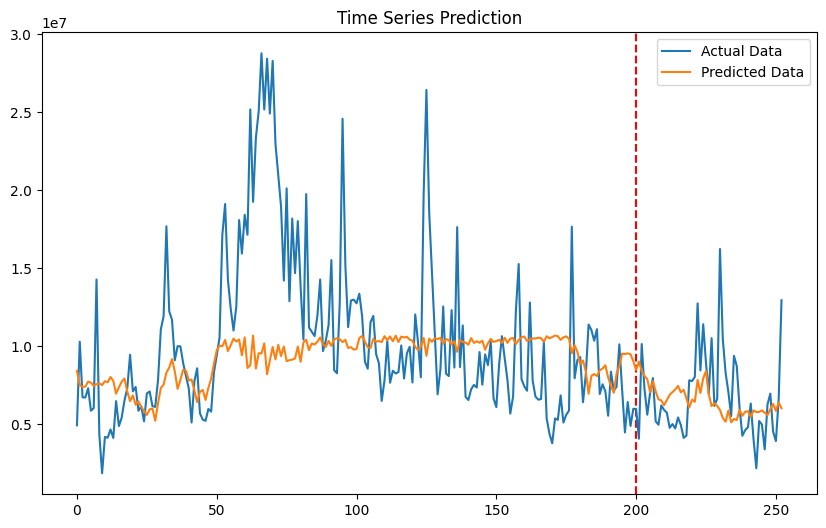

In [149]:
df_x_ss = ss.transform(data.iloc[:, :-1])
df_y_ms = ms.transform(data.iloc[:, -1:])

df_x_ss = Variable(torch.Tensor(df_x_ss))
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))

train_predict = model(df_x_ss)
predicted = train_predict.data.numpy()
label_y = df_y_ms.data.numpy()

predicted = ms.inverse_transform(predicted)
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10, 6))
plt.axvline(x = 200, c = 'r', linestyle='--')

plt.plot(label_y, label = 'Actual Data')
plt.plot(predicted, label = 'Predicted Data')
plt.title('Time Series Prediction')
plt.legend()
plt.show()